# Polynomial regression model (8 Feb 2019, 3.30pm to 3.50pm)

1. Introduction

    Polynomial regression analysis can also use a linear model to fit nonlinear data. HOW?:)
    
    Add powers of each input feature as new features and then train a linear model on this extended set of features
    
    y = $ \theta_{0}+ \theta_{1}(x_{1})^{n1} + \theta_{2}(x_{2})^{n2} + .....  $
    
    where y is the predicted value, $\theta_{i}$ is gradient for input feature $i$$^{th}$, $x$$^{th}$ is input feature $i$$^{th}$, $n1, n2.....$ are the powers and $\theta_{0}$ is the constant biased term. 

2. Importing relevant packages, libraries and classes associated with python
    
    * pandas - Open Source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language https://pandas.pydata.org/
    
    * numpy - fundamental package for scientific computing with Python http://www.numpy.org/
    
    * matplotlib.pyplot -  Python 2D plotting library https://matplotlib.org/
    
    * sklearn metrics - module which contains performance metrics etc. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    
    * sklearn.linear_model - module which introduces generalized linear models https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
    
    * sklearn.preprocessing - package which provides utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for specific estimators https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:
# importing relevant packages, libraries and classes associated with python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

with open('data/population.csv') as f:
   print(f)

<_io.TextIOWrapper name='data/population.csv' mode='r' encoding='cp1252'>


3. Reading in data

    * Use read_csv function in pandas to read in data file in csv format; csv represents comma separated values

In [2]:
# reading in csv file
# dataset = pd.read_csv('data/population.csv', encoding='cp1252')
dataset = pd.read_csv('population_linear_model.csv', encoding='cp1252')
dataset.head()
dataset.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,...,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02
mean,1.187222e+08,1.203176e+08,1.224503e+08,1.251051e+08,1.277810e+08,1.305236e+08,1.334126e+08,1.362964e+08,1.392314e+08,1.423099e+08,...,2.752697e+08,2.788450e+08,2.824422e+08,2.860278e+08,2.897065e+08,2.934371e+08,2.971970e+08,3.009663e+08,3.047575e+08,3.085448e+08
std,3.731578e+08,3.776353e+08,3.842151e+08,3.927915e+08,4.014130e+08,4.102730e+08,4.197034e+08,4.290872e+08,4.386771e+08,4.487508e+08,...,8.665798e+08,8.771692e+08,8.878267e+08,8.985256e+08,9.094238e+08,9.204524e+08,9.315466e+08,9.426515e+08,9.538130e+08,9.649626e+08
min,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,5.033000e+03,5.161000e+03,5.303000e+03,...,9.947000e+03,9.945000e+03,1.002500e+04,1.005700e+04,1.027900e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04,1.119200e+04
25%,5.313490e+05,5.441592e+05,5.575528e+05,5.684930e+05,5.791700e+05,5.850220e+05,5.926342e+05,6.017695e+05,6.120805e+05,6.229948e+05,...,1.350153e+06,1.380248e+06,1.387576e+06,1.400130e+06,1.415726e+06,1.431560e+06,1.447306e+06,1.471523e+06,1.522803e+06,1.577113e+06
50%,3.720409e+06,3.817784e+06,3.920245e+06,4.050336e+06,4.172302e+06,4.279066e+06,4.335242e+06,4.392265e+06,4.427282e+06,4.501523e+06,...,9.563920e+06,9.714708e+06,9.908114e+06,9.999411e+06,1.003766e+07,1.014287e+07,1.034389e+07,1.044324e+07,1.054522e+07,1.067587e+07
75%,2.595786e+07,2.681488e+07,2.768918e+07,2.857802e+07,2.946820e+07,3.033314e+07,3.111964e+07,3.152311e+07,3.193057e+07,3.229729e+07,...,5.672308e+07,5.706423e+07,5.735423e+07,5.760047e+07,5.790434e+07,5.861731e+07,5.922675e+07,5.937074e+07,5.947449e+07,5.974107e+07
max,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,3.394784e+09,3.464689e+09,3.535355e+09,3.610179e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09


4. Data management to split dataset for training and validation

    * Available train_test_split function in sklearn.model_selection can do the splitting.
      
      See more information sklearn.model_selection https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

    QUESTION: Why not use in-built function in python to do the data splitting then? 

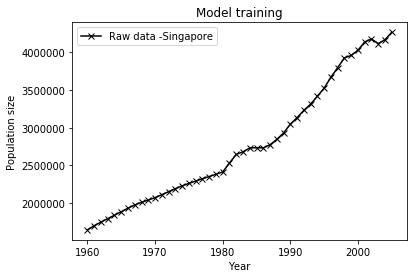

In [3]:
# data management for setting up training and validation dataset
dummy_index = 0
country_name = 'Singapore'
for i in range (len(dataset)):
    if dataset['Country Name'][i] == country_name:
        dummy_index = i

start_year = 1960
end_year = 2017
diff_year = end_year - start_year
year_list = []
for i in range(diff_year+1):
    year = start_year + i
    year_list.append(year)
    
train_data_year = []
validate_data_year = []
train_data = []
validate_data = []
train_percent = 0.80
train_index_end = int(train_percent*len(year_list))

for i in range(train_index_end):
    sub_list1 = []
    train_data_year.append(year_list[i])
    train_data.append(dataset[str(year_list[i])][dummy_index])
for j in range(train_index_end,len(year_list)):
    validate_data_year.append(year_list[j])
    validate_data.append(dataset[str(year_list[j])][dummy_index])
    
train_data_year = (np.array(train_data_year))
X_train = train_data_year.reshape(len(train_data_year),-1)

train_data = (np.array(train_data))
Y_train = train_data.reshape(len(train_data),-1)

validate_data_year = (np.array(validate_data_year))
X_validate = validate_data_year.reshape(len(validate_data_year),-1)

validate_data = (np.array(validate_data))
Y_validate = validate_data.reshape(len(validate_data),-1)

graph = plt.plot(train_data_year,train_data,'-x', label = 'Raw data' + ' ' + '-' + (str(country_name)),color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model training')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

5. Model-training to build predictive linear model

    * Use the PolynomialFeatures function to first transform the training dataset 
      
      See more information from sklearn.preprocessing.PolynomialFeatures https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
    
    * Use available LinearRegression function in linear_model module to fit the transformed training dataset
      
      see more information from sklearn.linear_model - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

[[ 5.69164209e+07 -2.95691479e+04  5.12111215e+00]] [-3.652122e+10]


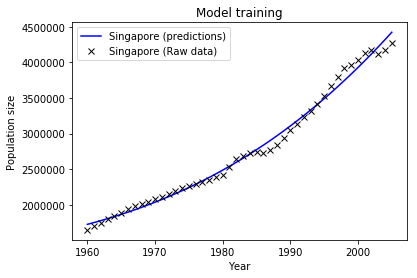

In [4]:
# train predictive model
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_model.fit_transform(X_train)
model_train = linear_model.fit(X_poly_train,Y_train)
m = model_train.coef_
c = model_train.intercept_
print(m,c)

pred_data_train =  model_train.predict(X_poly_train)
graph1 = plt.plot(train_data_year,pred_data_train,'-', label = str(country_name) + " " + '(predictions)',color = 'b')
graph2 = plt.plot(train_data_year,train_data,'x', label = str(country_name) + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model training')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

6. Model-validation to validate predictive linear model

    * Use available predict function in linear_model module to compute the output values for the validation dataset and test accuracy of predictions
      
      see more information from sklearn.linear_model - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

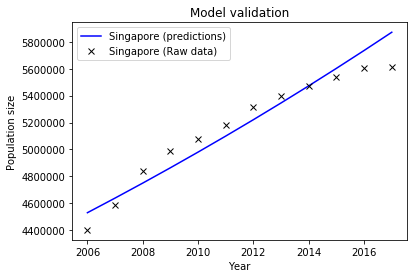

The average error for the validation step is 1.91%.


In [5]:
# test predictive model
X_poly_validate = poly_model.fit_transform(X_validate)
pred_data = model_train.predict(X_poly_validate)

graph1 = plt.plot(validate_data_year,pred_data,'-', label = str(country_name) + " " + '(predictions)',color = 'b')
graph2 = plt.plot(validate_data_year,validate_data,'x', label = str(country_name) + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model validation')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

total_error = 0
avg_error = 0
for i in range(len(pred_data)):
    total_error += (abs(pred_data[i]-Y_validate[i])/min(pred_data[i],Y_validate[i]))
avg_error = (total_error/len(pred_data)) * 100
print('The average error for the validation step is ' + str(round(float(avg_error),2)) + '%' + '.')

### Now let's try modelling the global population. Your "homework" :)

58
58


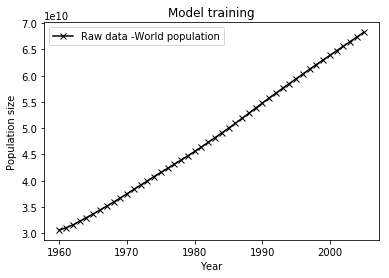

[[-1.17023193e+12  5.87792862e+08 -9.83362926e+04]] [7.76046641e+14]


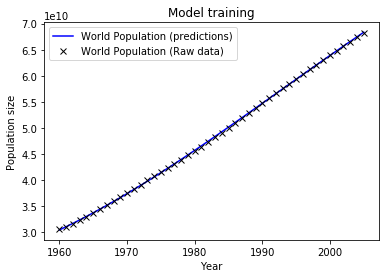

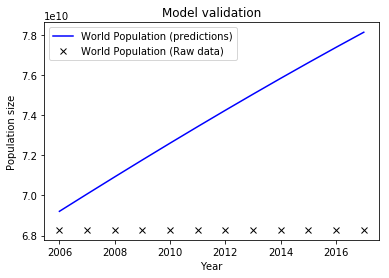

The average error for the validation step is 8.04%.


In [6]:
# compiling the global population for each year
global_pop = []
print(len(year_list))
for year in year_list:
    total = 0
    for i in range(len(dataset)-2):
#         if str(dataset[str(year)][i+2] == 'nan'):
#             print(str(i+2), str(year))
        total += dataset[str(year)][i+2]
    global_pop.append(total)
print(len(global_pop))

train_data_year = []
validate_data_year = []
train_data = []
validate_data = []
train_percent = 0.80
train_index_end = int(train_percent*len(year_list))

for i in range(train_index_end):
    sub_list1 = []
    train_data_year.append(year_list[i])
    train_data.append(global_pop[i])
for j in range(train_index_end,len(year_list)):
    validate_data_year.append(year_list[j])
    validate_data.append(global_pop[i])
    
train_data_year = (np.array(train_data_year))
X_train = train_data_year.reshape(len(train_data_year),-1)

train_data = (np.array(train_data))
Y_train = train_data.reshape(len(train_data),-1)

validate_data_year = (np.array(validate_data_year))
X_validate = validate_data_year.reshape(len(validate_data_year),-1)

validate_data = (np.array(validate_data))
Y_validate = validate_data.reshape(len(validate_data),-1)

graph = plt.plot(train_data_year,train_data,'-x', label = 'Raw data' + ' ' + '-' + 'World population',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model training')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

# train predictive model
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_model.fit_transform(X_train)
model_train = linear_model.fit(X_poly_train,Y_train)
m = model_train.coef_
c = model_train.intercept_
print(m,c)

pred_data_train =  model_train.predict(X_poly_train)
graph1 = plt.plot(train_data_year,pred_data_train,'-', label = 'World Population' + " " + '(predictions)',color = 'b')
graph2 = plt.plot(train_data_year,train_data,'x', label = 'World Population' + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model training')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

# test predictive model
X_poly_validate = poly_model.fit_transform(X_validate)
pred_data = model_train.predict(X_poly_validate)

graph1 = plt.plot(validate_data_year,pred_data,'-', label = 'World Population' + " " + '(predictions)',color = 'b')
graph2 = plt.plot(validate_data_year,validate_data,'x', label = 'World Population' + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model validation')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.show()

total_error = 0
avg_error = 0
for i in range(len(pred_data)):
    total_error += (abs(pred_data[i]-Y_validate[i])/min(pred_data[i],Y_validate[i]))
avg_error = (total_error/len(pred_data)) * 100
print('The average error for the validation step is ' + str(round(float(avg_error),2)) + '%' + '.')